In [1]:
import sys
sys.path.insert(0, "..")
from eis_toolkit.vector_processing.simple_idw import simple_idw

import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from pyproj import CRS
import rasterio

In [2]:
data = {
        'random_number': [124, 248, 496, 992],
        'geometry': [Point(24.945831, 60.192059), Point(24.6559, 60.2055),
                     Point(25.0378, 60.2934), Point(24.7284, 60.2124)]
    }

gdf = gpd.GeoDataFrame(data)

crs = CRS.from_epsg(4326)
gdf.crs = crs

In [3]:
x, y, interpolated_values = simple_idw(
    geodataframe=gdf,
    target_column='random_number',
    #resolution=(0.005, 0.005),
    resolution=(0.0049, 0.0047),
    #output_resolution=(0.005, 0.005),
    extent=(24.6558990000000016, 60.1920590000000004, 25.0378036000000002, 60.2934078769999999),
    #extent=None,
    power=2
)

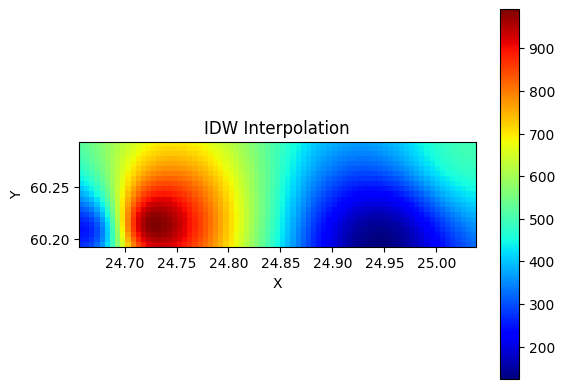

In [4]:
# Plot the interpolated values
plt.imshow(interpolated_values, cmap='jet', extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('IDW Interpolation')
plt.show()

In [5]:
# Saves the output of the most recently executed interpolation
# As a GeoTIFF to the eis_toolkit/notebooks folder.
output_file = 'test.tif'

# Create a rasterio dataset for writing the GeoTIFF
with rasterio.open(output_file, 'w', driver='GTiff', width=interpolated_values.shape[1],
                   height=interpolated_values.shape[0], count=1, dtype=interpolated_values.dtype,
                   crs=gdf.crs, transform=rasterio.transform.from_bounds(x.min(), y.min(), x.max(), y.max(), interpolated_values.shape[1], interpolated_values.shape[0])) as dst:
    # Write the interpolated values to the GeoTIFF band
    dst.write(interpolated_values, 1)

print(f"Interpolated values saved as GeoTIFF: {output_file}")

Interpolated values saved as GeoTIFF: test.tif


In [6]:
data = {
        "value1": [1, 2, 3, 4, 5],
        "value2": [5, 4, 3, 2, 1],
        "geometry": [Point(0, 0), Point(1, 1), Point(2, 2), Point(3, 3), Point(4, 4)],
}
simple_gdf = gpd.GeoDataFrame(data)

In [7]:
x, y, interpolated_values = simple_idw(
    geodataframe=simple_gdf,
    target_column='value1',
    resolution=(1, 1),
    extent=None,
    power=2
)

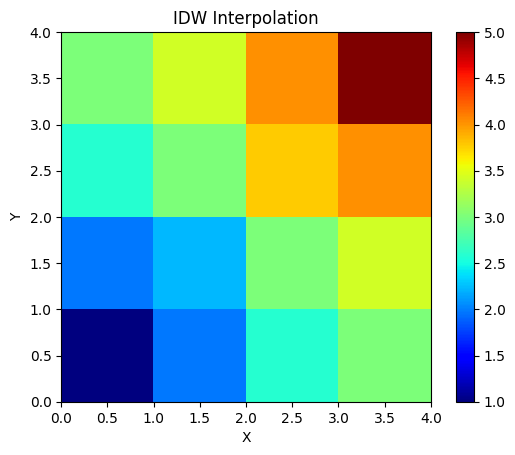

In [8]:
plt.imshow(interpolated_values, cmap='jet', extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('IDW Interpolation')
plt.show()

In [9]:
x, y, interpolated_values = simple_idw(
    geodataframe=simple_gdf,
    target_column='value2',
    resolution=(1, 1),
    extent=None,
    power=2
)

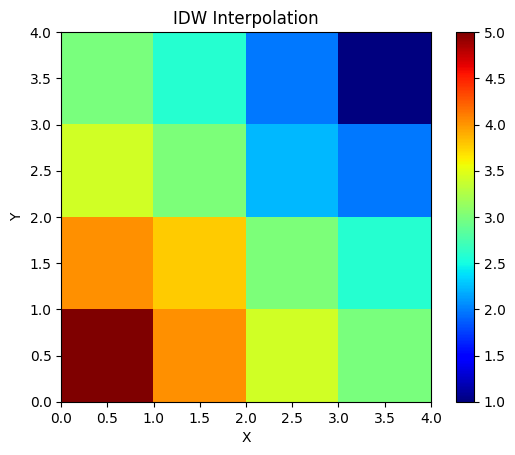

In [10]:
plt.imshow(interpolated_values, cmap='jet', extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('IDW Interpolation')
plt.show()